# Parameter Change Gifs

In [1]:
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt

from fooof.sim.params import Stepper
from fooof.sim import gen_power_spectrum
from fooof.core.info import get_indices

/var/folders/59/8y2d5r257c77vzymnqs47x080000gn/T/ipykernel_66806/3873724712.py:6: DeprecationWarning: 
The `fooof` package is being deprecated and replaced by the `specparam` (spectral parameterization) package.
This version of `fooof` (1.1) is fully functional, but will not be further updated.
New projects are recommended to update to using `specparam` (see Changelog for details).
  from fooof.sim.params import Stepper


In [2]:
import seaborn as sns
sns.set_context('poster')

In [3]:
# Import custom code
from vcode.plts import plot_spectra, plot_bar
from vcode.gif import clear_output, animate_plot
from vcode.utils import incrementer

## SETTINGS

In [ ]:
# Set which aperiodic mode to run
AP_MODE = 'knee'

In [128]:
# Simulation settings
if AP_MODE == 'fixed':
    F_RANGE = [3, 35]
    AP_DEF = [1, 1]
    OSC_DEF = [10, 0.5, 0.5]
else:
    F_RANGE = [3, 150]
    AP_MODE == [1, 25, 1]
    OSC_DEF = [6, 0.25, 0.5]

In [129]:
# Plot settings
YLIM = np.log10([0.1, 20]) if AP_MODE == 'fixed' else np.log10([0.025, 0.5])
LOG_FREQS = True

In [130]:
# Set whether to save out
SAVE = False

## DEFINE AXES

In [131]:
def make_axes():
    
    fig, ax = plt.subplots(figsize=(6, 5))
    
    return fig, ax

## SIMULATE DATA

In [132]:
freqs, powers = gen_power_spectrum(F_RANGE, AP_DEF, OSC_DEF,
                                   nlv=0, freq_res=0.25, f_rotation=None)

## EXAMPLE PLOT

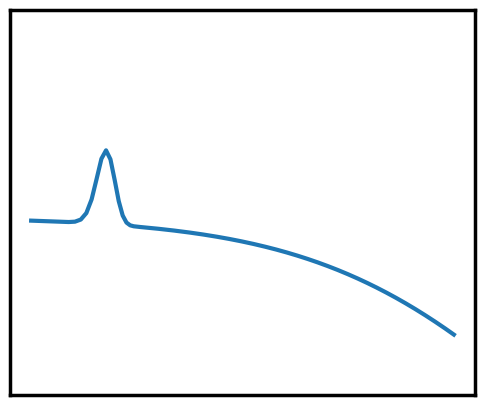

In [133]:
fig, ax = make_axes()
plot_spectra(freqs, [powers], log_freqs=LOG_FREQS, ylim=YLIM, ax=ax)

## BUILDER FUNCTION

In [134]:
def build_all(start, stop, step, component, parameter, ap_mode, sleep=0.10, save=False):
    
    inds = get_indices(ap_mode)
    
    ap_def = deepcopy(AP_DEF)
    osc_def = deepcopy(OSC_DEF)
    
    ind = incrementer()
    for pstep in list(Stepper(start, stop, step)) + list(Stepper(stop, start, -step)):
        
        if component == 'aperiodic':
            ap_def[inds[parameter]] = pstep
        if component == 'periodic':
            osc_def[inds[parameter]] = pstep
            
        f_rotation = 10 if parameter == 'exponent' and ap_mode == 'fixed' else None
        freqs, powers = gen_power_spectrum(F_RANGE, ap_def, osc_def,
                                           nlv=0, freq_res=0.1, f_rotation=f_rotation)
                    
        clear_output(wait=True)
            
        fig, ax = make_axes()
        plot_spectra(freqs, [powers], alpha=0.75, ylim=YLIM,
                     log_freqs=LOG_FREQS, log_powers=True, ax=ax)

        animate_plot(fig, save, next(ind), 'specrot', sleep)

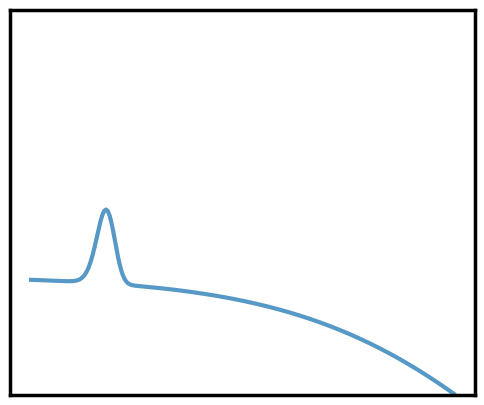

In [135]:
build_all(0.75, 1.25, 0.05, 'aperiodic', 'offset', 'fixed')

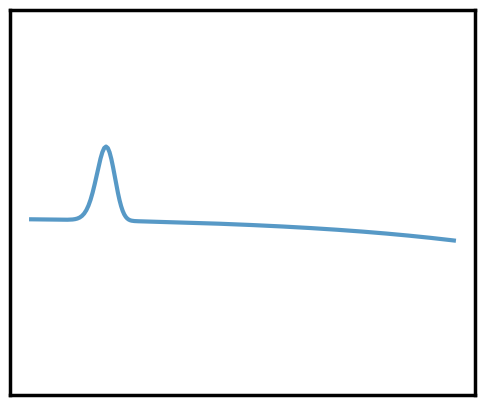

In [136]:
build_all(0.5, 1.5, 0.1, 'aperiodic', 'exponent', AP_MODE)

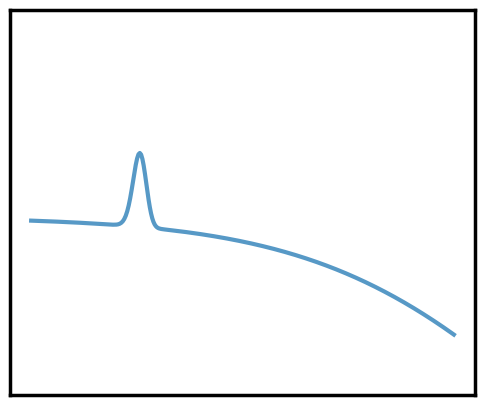

In [137]:
build_all(8, 12, 0.2, 'periodic', 'CF', AP_MODE)

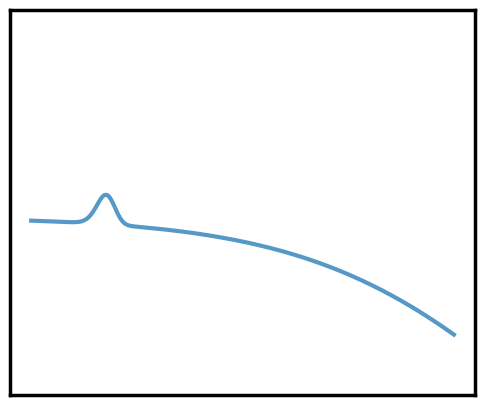

In [138]:
build_all(0, 1, 0.1, 'periodic', 'PW', AP_MODE)

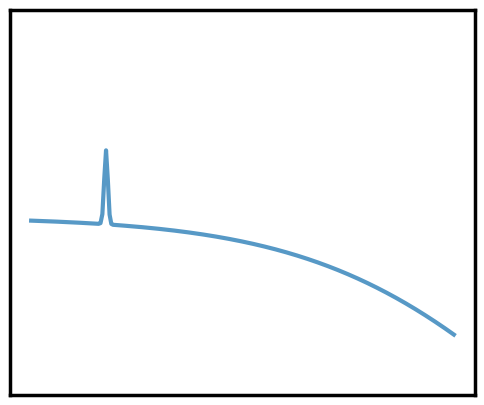

In [139]:
build_all(0, 1, 0.1, 'periodic', 'BW', AP_MODE)